# APLICAÇÕES DE MACHINE LEARNING COMO MÉTODO PARA ANÁLISE DOS DADOS DA PANDEMIA DE COVID-19 NO ESTADO DE SÃO PAULO

In [1]:
#Importanto a Biblioteca

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificação da Base Casos e Óbitos

<img src="Dicionário de Dados - Casos e Óbitos por Município e Data.png" alt="Dicionário de Dados - Casos e Óbitos por Município e Data.png"/>

In [2]:
#Baixando a base

caminho_arquivo = r"D:\Pós-graduação - Curso de Especialização Ciências de Dados e Inteligência Artificial\TCC\Casos e óbitos por municípios e data - 09.06.2023\dados_covid_sp.csv"
dados_covid_sp = pd.read_csv(caminho_arquivo, sep=';')
dados_covid_sp

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773903,Ignorado,9999999,2,6,2023-06-02,607,-240,"0,00000000000000e+00","-31,428571428571427",5,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",22
773904,Ignorado,9999999,3,6,2023-06-03,565,-42,"0,00000000000000e+00","-33,857142857142854",5,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",22
773905,Ignorado,9999999,4,6,2023-06-04,444,-121,"0,00000000000000e+00","-54,571428571428569",4,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",23
773906,Ignorado,9999999,5,6,2023-06-05,403,-41,"0,00000000000000e+00","-50,285714285714285",4,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",23


In [3]:
#Verificando as colunas (variáveis) da base

dados_covid_sp.columns

Index(['nome_munic', 'codigo_ibge', 'dia', 'mes', 'datahora', 'casos',
       'casos_novos', 'casos_pc', 'casos_mm7d', 'obitos', 'obitos_novos',
       'obitos_pc', 'obitos_mm7d', 'letalidade', 'nome_ra', 'cod_ra',
       'nome_drs', 'cod_drs', 'pop', 'pop_60', 'area', 'map_leg', 'map_leg_s',
       'latitude', 'longitude', 'semana_epidem'],
      dtype='object')

In [4]:
#Verificando as informações da base

dados_covid_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773908 entries, 0 to 773907
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nome_munic     773908 non-null  object 
 1   codigo_ibge    773908 non-null  int64  
 2   dia            773908 non-null  int64  
 3   mes            773908 non-null  int64  
 4   datahora       773908 non-null  object 
 5   casos          773908 non-null  int64  
 6   casos_novos    773908 non-null  int64  
 7   casos_pc       773908 non-null  object 
 8   casos_mm7d     773908 non-null  object 
 9   obitos         773908 non-null  int64  
 10  obitos_novos   773908 non-null  int64  
 11  obitos_pc      773908 non-null  object 
 12  obitos_mm7d    773908 non-null  object 
 13  letalidade     773908 non-null  object 
 14  nome_ra        772710 non-null  object 
 15  cod_ra         773908 non-null  int64  
 16  nome_drs       772710 non-null  object 
 17  cod_drs        773908 non-nul

In [5]:
#Verificando o lançamento de municípios na base

municipios = dados_covid_sp['nome_munic']
contagem = municipios.value_counts()
print(contagem)

Adamantina         1198
Parapuã            1198
Pilar do Sul       1198
Pindamonhangaba    1198
Pindorama          1198
                   ... 
Holambra           1198
Hortolândia        1198
Iacanga            1198
Iacri              1198
Ignorado           1198
Name: nome_munic, Length: 646, dtype: int64


In [6]:
#Ajustando a variável "datahora"

dados_covid_sp['datahora'] = pd.to_datetime(dados_covid_sp['datahora'])
dados_covid_sp['datahora'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 773908 entries, 0 to 773907
Series name: datahora
Non-Null Count   Dtype         
--------------   -----         
773908 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.9 MB


In [7]:
#Organizando a base por "datahora" crescente

dados_covid_sp.sort_values(by='datahora',ascending=True)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
426,Pilar do Sul,3537909,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Sorocaba,6,28221,4259,68125,0,8.0,"-23,8077","-47,7222",9
427,Pindamonhangaba,3538006,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Taubaté,17,163611,23934,730,0,8.0,"-22,9246","-45,4613",9
428,Pindorama,3538105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,16255,2914,18483,0,8.0,"-21,1853","-48,9086",9
429,Pinhalzinho,3538204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,14755,2867,15453,0,8.0,"-22,7811","-46,5897",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772281,Holambra,3519055,6,6,2023-06-06,3903,0,"2,69302421858828e+04","0,285714285714286",23,...,Campinas,3,14493,1881,6558,<5000,2.0,"-22,6405","-47,0487",23
772282,Hortolândia,3519071,6,6,2023-06-06,40556,1,"1,76125210624142e+04","2,714285714285714",896,...,Campinas,3,230268,26129,6242,>5000,1.0,"-22,8529","-47,2143",23
772283,Iacanga,3519105,6,6,2023-06-06,1926,0,"1,70352025473200e+04","0,000000000000000",34,...,Bauru,12,11306,1824,54739,<5000,2.0,"-21,8896","-49,0310",23
772305,Iperó,3521002,6,6,2023-06-06,6293,0,"1,83191662785282e+04","0,000000000000000",78,...,Sorocaba,6,34352,4001,17029,>5000,1.0,"-23,3513","-47,6927",23


In [8]:
#Definindo o intervalo temporal da base para o triênio (2020, 2021, 2023)

covid = dados_covid_sp[dados_covid_sp['datahora']<='2022-12-31']
covid

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773746,Ignorado,9999999,27,12,2022-12-27,630,-31,"0,00000000000000e+00","-17,142857142857142",48,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52
773747,Ignorado,9999999,28,12,2022-12-28,779,149,"0,00000000000000e+00","12,000000000000000",56,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52
773748,Ignorado,9999999,29,12,2022-12-29,777,-2,"0,00000000000000e+00","11,142857142857142",53,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52
773749,Ignorado,9999999,30,12,2022-12-30,962,185,"0,00000000000000e+00","25,714285714285715",55,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52


In [9]:
#Criando o vetor de população do município

pop = covid.drop_duplicates(subset=['nome_munic','pop'])
# Agregar os dados pela coluna 'municipio' e somar a população única
pop_municipio = pop.groupby('nome_munic')['pop'].sum()
# Exibir a soma da população por município
print(pop_municipio)
# Exibir a população total
pop_total = pop_municipio.sum()
print('População total:', pop_total)

nome_munic
Adamantina            33894
Adolfo                 3447
Aguaí                 35608
Agudos                36134
Alambari               5779
                      ...  
Águas de São Pedro     3122
Álvares Florence       3621
Álvares Machado       23789
Álvaro de Carvalho     5044
Óleo                   2527
Name: pop, Length: 646, dtype: int64
População total: 44639899


In [10]:
#Verificando as informações da base com o intervalo temporal definido para o triênio

covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672486 entries, 0 to 773750
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nome_munic     672486 non-null  object        
 1   codigo_ibge    672486 non-null  int64         
 2   dia            672486 non-null  int64         
 3   mes            672486 non-null  int64         
 4   datahora       672486 non-null  datetime64[ns]
 5   casos          672486 non-null  int64         
 6   casos_novos    672486 non-null  int64         
 7   casos_pc       672486 non-null  object        
 8   casos_mm7d     672486 non-null  object        
 9   obitos         672486 non-null  int64         
 10  obitos_novos   672486 non-null  int64         
 11  obitos_pc      672486 non-null  object        
 12  obitos_mm7d    672486 non-null  object        
 13  letalidade     672486 non-null  object        
 14  nome_ra        671445 non-null  object        
 15  

In [11]:
#Verificando campos em branco na base do triênio

covid.isnull().sum()

nome_munic          0
codigo_ibge         0
dia                 0
mes                 0
datahora            0
casos               0
casos_novos         0
casos_pc            0
casos_mm7d          0
obitos              0
obitos_novos        0
obitos_pc           0
obitos_mm7d         0
letalidade          0
nome_ra          1041
cod_ra              0
nome_drs         1041
cod_drs             0
pop                 0
pop_60              0
area                0
map_leg          1041
map_leg_s        1041
latitude            0
longitude           0
semana_epidem       0
dtype: int64

In [12]:
#Verificando se os campos em branco tem relação com o município "Ignorado" na soma dos lançamentos

ignorado = (covid['nome_munic'] == 'Ignorado').sum()
ignorado

1041

In [13]:
#Verificando se os campos em branco tem relação com o município "Ignorado" na base

ignorado = covid[covid['nome_munic'] == 'Ignorado']
ignorado

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
772710,Ignorado,9999999,25,2,2020-02-25,-1,0,"0,00000000000000e+00","0,000000000000000",0,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",9
772711,Ignorado,9999999,26,2,2020-02-26,0,1,"0,00000000000000e+00","0,000000000000000",0,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",9
772712,Ignorado,9999999,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",9
772713,Ignorado,9999999,28,2,2020-02-28,-1,-1,"0,00000000000000e+00","0,000000000000000",0,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",9
772714,Ignorado,9999999,29,2,2020-02-29,0,1,"0,00000000000000e+00","0,000000000000000",0,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773746,Ignorado,9999999,27,12,2022-12-27,630,-31,"0,00000000000000e+00","-17,142857142857142",48,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52
773747,Ignorado,9999999,28,12,2022-12-28,779,149,"0,00000000000000e+00","12,000000000000000",56,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52
773748,Ignorado,9999999,29,12,2022-12-29,777,-2,"0,00000000000000e+00","11,142857142857142",53,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52
773749,Ignorado,9999999,30,12,2022-12-30,962,185,"0,00000000000000e+00","25,714285714285715",55,...,NaN,0,0,0,0,NaN,NaN,"0,0000","0,0000",52


In [14]:
#Como existem 645 nunicípios e apenas 17 DRS na base, os dados serão verificados por DRS
#Ajustando "nome_drs" de NaN para "Ignorado"

covid['nome_drs'] = covid['nome_drs'].fillna('Ignorado')
covid['nome_drs'].unique()

C:\Users\wagne\AppData\Local\Temp\ipykernel_26936\285373899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['nome_drs'] = covid['nome_drs'].fillna('Ignorado')


array(['Marília', 'São José do Rio Preto', 'São João da Boa Vista',
       'Campinas', 'Bauru', 'Piracicaba', 'Sorocaba',
       'Presidente Prudente', 'Barretos', 'Ribeirão Preto', 'Araçatuba',
       'Araraquara', 'Taubaté', 'Franca', 'Grande São Paulo', 'Registro',
       'Baixada Santista', 'Ignorado'], dtype=object)

In [15]:
#Contando quantas DRS existem na base para conferência, com o "Ignorado"

quantidade_valores_unicos = covid['nome_drs'].nunique()
quantidade_valores_unicos

18

# Análise Univariada

### CASOS POR DRS

In [16]:
#Verificação de "casos novos" no triênio, por DRS

# Realizando a soma dos casos por 'nome_drs'
casos_drs = covid[['nome_drs', 'casos_novos']]
soma_casos_drs = casos_drs.groupby('nome_drs')['casos_novos'].sum()

# Ordenando em ordem crescente
soma_casos_drs_ordenado = soma_casos_drs.sort_values(ascending=True)

soma_casos_drs_ordenado

nome_drs
Ignorado                     830
Registro                   56402
Franca                     83394
Barretos                   85402
Presidente Prudente       138071
Araçatuba                 180259
São João da Boa Vista     185306
Araraquara                212191
Ribeirão Preto            219458
Marília                   225376
Baixada Santista          231197
Piracicaba                284603
Taubaté                   389150
Bauru                     390186
Sorocaba                  411174
São José do Rio Preto     443368
Campinas                  770254
Grande São Paulo         2010631
Name: casos_novos, dtype: int64

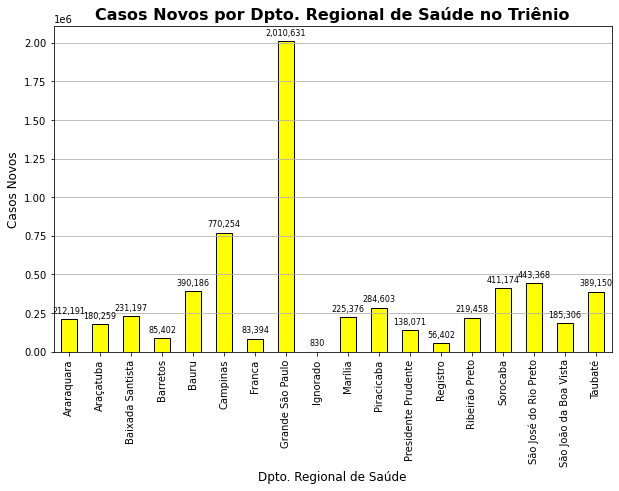

In [17]:
ax = soma_casos_drs.plot(kind='bar', figsize=(10, 6), color='yellow', edgecolor='black')
ax.set_title('Casos Novos por Dpto. Regional de Saúde no Triênio', fontsize=16, fontweight='bold')
ax.set_xlabel('Dpto. Regional de Saúde', fontsize=12)
ax.set_ylabel('Casos Novos', fontsize=12)
ax.set_xticklabels(soma_casos_drs.index, rotation=90, fontsize=10)  # rótulos na vertical
ax.yaxis.grid(True)

for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(rect.get_height()):,}" if rect.get_height() > 0 else "" for rect in container], 
                 label_type='edge', fontsize=8, padding=4)

plt.show()


In [18]:
#Média de casos novos por dia no triênio

media_casos = covid['casos_novos'].mean()
media_casos_formatado = round(media_casos, 2)
media_casos_formatado

9.39

In [19]:
#Total de casos novos no triênio

covid['casos_novos'].sum()

6317252

In [20]:
#Casos novos por ano

#Criar coluna de ano
covid['ano'] = covid['datahora'].dt.year

C:\Users\wagne\AppData\Local\Temp\ipykernel_26936\780734610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['ano'] = covid['datahora'].dt.year


In [21]:
#Verificar casos novos por ano

casos_por_ano = covid.groupby('ano')['casos_novos'].sum()
casos_por_ano

ano
2020    1462297
2021    2993811
2022    1861144
Name: casos_novos, dtype: int64

In [22]:
#Casos por DRS em 2020

casos_drs2020 = covid.loc[covid['ano'] == 2020, ['nome_drs', 'casos_novos']]
soma_casos_drs2020 = casos_drs2020.groupby('nome_drs')['casos_novos'].sum()
soma_casos_drs2020

# Ordenando em ordem crescente
soma_casos_drs2020_ordenado = soma_casos_drs2020.sort_values(ascending=True)
soma_casos_drs2020_ordenado

nome_drs
Ignorado                    264
Registro                  10688
Barretos                  16973
Franca                    17173
Presidente Prudente       21025
São João da Boa Vista     21144
Marília                   24823
Araraquara                26223
Araçatuba                 28796
Ribeirão Preto            54454
Bauru                     58173
Piracicaba                59554
Sorocaba                  67944
Taubaté                   70353
Baixada Santista          77407
São José do Rio Preto     88175
Campinas                 156218
Grande São Paulo         662910
Name: casos_novos, dtype: int64

In [23]:
#Casos por DRS em 2021

casos_drs2021 = covid.loc[covid['ano'] == 2021, ['nome_drs', 'casos_novos']]
soma_casos_drs2021 = casos_drs2021.groupby('nome_drs')['casos_novos'].sum()
soma_casos_drs2021

# Ordenando em ordem crescente
soma_casos_drs2021_ordenado = soma_casos_drs2021.sort_values(ascending=True)
soma_casos_drs2021_ordenado

nome_drs
Ignorado                   2155
Registro                  21179
Barretos                  38718
Franca                    55992
Presidente Prudente       66495
São João da Boa Vista     71672
Araçatuba                 73107
Araraquara                86766
Baixada Santista          92085
Marília                  113375
Ribeirão Preto           123035
Piracicaba               134308
Bauru                    165192
São José do Rio Preto    179664
Taubaté                  200972
Sorocaba                 215969
Campinas                 354185
Grande São Paulo         998942
Name: casos_novos, dtype: int64

In [24]:
#Casos por DRS em 2022

casos_drs2022 = covid.loc[covid['ano'] == 2022, ['nome_drs', 'casos_novos']]
soma_casos_drs2022 = casos_drs2022.groupby('nome_drs')['casos_novos'].sum()
soma_casos_drs2022

# Ordenando em ordem crescente
soma_casos_drs2022_ordenado = soma_casos_drs2022.sort_values(ascending=True)
soma_casos_drs2022_ordenado

nome_drs
Ignorado                  -1589
Franca                    10229
Registro                  24535
Barretos                  29711
Ribeirão Preto            41969
Presidente Prudente       50551
Baixada Santista          61705
Araçatuba                 78356
Marília                   87178
Piracicaba                90741
São João da Boa Vista     92490
Araraquara                99202
Taubaté                  117825
Sorocaba                 127261
Bauru                    166821
São José do Rio Preto    175529
Campinas                 259851
Grande São Paulo         348779
Name: casos_novos, dtype: int64

### ÓBITOS POR DRS

In [25]:
#Verificação de "óbitos novos" no triênio, por DRS

# Realizando a soma dos casos por 'nome_drs'
obitos_drs = covid[['nome_drs', 'obitos_novos']]
soma_obitos_drs = obitos_drs.groupby('nome_drs')['obitos_novos'].sum()

# Ordenando em ordem crescente
soma_obitos_drs_ordenado = soma_obitos_drs.sort_values(ascending=True)
soma_obitos_drs_ordenado

nome_drs
Ignorado                    56
Registro                  1085
Barretos                  2068
Franca                    2381
Presidente Prudente       3179
Araraquara                3210
São João da Boa Vista     3388
Araçatuba                 3692
Marília                   5007
Piracicaba                6077
Ribeirão Preto            6333
Bauru                     6429
Taubaté                   8141
Baixada Santista          8520
São José do Rio Preto     9231
Sorocaba                  9927
Campinas                 17831
Grande São Paulo         80880
Name: obitos_novos, dtype: int64

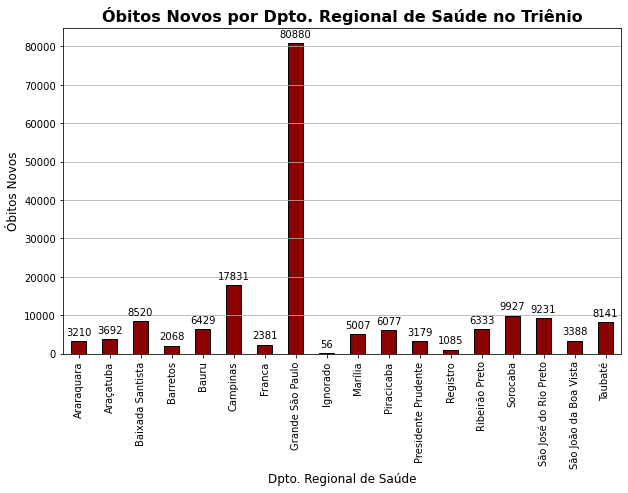

In [26]:
#Representação gráfica dos resultados

axo = soma_obitos_drs.plot(kind='bar', figsize=(10, 6), color='darkred', edgecolor='black')
axo.set_title('Óbitos Novos por Dpto. Regional de Saúde no Triênio', fontsize=16, fontweight='bold')
axo.set_xlabel('Dpto. Regional de Saúde', fontsize=12)
axo.set_ylabel('Óbitos Novos', fontsize=12)
axo.set_xticklabels(soma_obitos_drs.index, rotation=90, fontsize=10)  # rótulos na vertical
axo.yaxis.grid(True)

for i in axo.containers:
    axo.bar_label(i, label_type='edge', fontsize=10, padding=4)

axo.yaxis.grid(True)
plt.show()

In [27]:
#Média de óbitos novos por dia no triênio

media_obitos = covid['obitos_novos'].mean()
media_obitos_formatado = round(media_obitos, 2)
media_obitos_formatado

0.26

In [28]:
#Total de óbitos novos no triênio

covid['obitos_novos'].sum()

177435

In [29]:
#Óbitos novos por ano

obitos_novos = covid[['ano', 'obitos_novos']]
obitos_por_ano = obitos_novos.groupby('ano')['obitos_novos'].sum()
obitos_por_ano

ano
2020     46717
2021    108488
2022     22230
Name: obitos_novos, dtype: int64

In [30]:
#Óbitos por DRS em 2020

obitos_drs2020 = covid.loc[covid['ano'] == 2020, ['nome_drs', 'obitos_novos']]
soma_obitos_drs2020 = obitos_drs2020.groupby('nome_drs')['obitos_novos'].sum()
soma_obitos_drs2020

# Ordenando em ordem crescente
soma_obitos_drs2020_ordenado = soma_obitos_drs2020.sort_values(ascending=True)
soma_obitos_drs2020_ordenado

nome_drs
Ignorado                     9
Registro                   276
Barretos                   397
Araraquara                 450
São João da Boa Vista      466
Marília                    476
Franca                     502
Presidente Prudente        512
Araçatuba                  667
Bauru                      982
Piracicaba                1340
Taubaté                   1584
Ribeirão Preto            1637
Sorocaba                  1649
São José do Rio Preto     2220
Baixada Santista          2706
Campinas                  4222
Grande São Paulo         26622
Name: obitos_novos, dtype: int64

In [31]:
#Óbitos por DRS em 2021

obitos_drs2021 = covid.loc[covid['ano'] == 2021, ['nome_drs', 'obitos_novos']]
soma_obitos_drs2021 = obitos_drs2021.groupby('nome_drs')['obitos_novos'].sum()
soma_obitos_drs2021

# Ordenando em ordem crescente
soma_obitos_drs2021_ordenado = soma_obitos_drs2021.sort_values(ascending=True)
soma_obitos_drs2021_ordenado

nome_drs
Ignorado                    -1
Registro                   664
Barretos                  1491
Franca                    1559
Presidente Prudente       2170
Araraquara                2310
São João da Boa Vista     2414
Araçatuba                 2636
Ribeirão Preto            3714
Marília                   3725
Piracicaba                3891
Bauru                     4538
Baixada Santista          4646
Taubaté                   5050
São José do Rio Preto     5783
Sorocaba                  7157
Campinas                 10822
Grande São Paulo         45919
Name: obitos_novos, dtype: int64

In [32]:
#Óbitos por DRS em 2022

obitos_drs2022 = covid.loc[covid['ano'] == 2022, ['nome_drs', 'obitos_novos']]
soma_obitos_drs2022 = obitos_drs2022.groupby('nome_drs')['obitos_novos'].sum()
soma_obitos_drs2022

# Ordenando em ordem crescente
soma_obitos_drs2022_ordenado = soma_obitos_drs2022.sort_values(ascending=True)
soma_obitos_drs2022_ordenado

nome_drs
Ignorado                   48
Registro                  145
Barretos                  180
Franca                    320
Araçatuba                 389
Araraquara                450
Presidente Prudente       497
São João da Boa Vista     508
Marília                   806
Piracicaba                846
Bauru                     909
Ribeirão Preto            982
Sorocaba                 1121
Baixada Santista         1168
São José do Rio Preto    1228
Taubaté                  1507
Campinas                 2787
Grande São Paulo         8339
Name: obitos_novos, dtype: int64

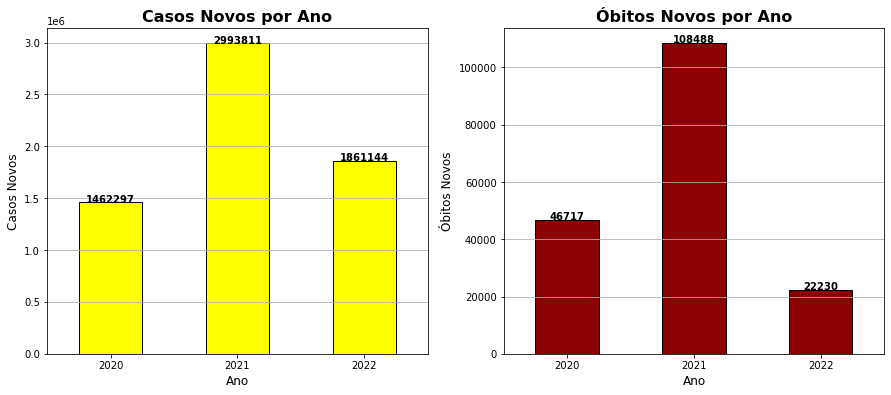

In [33]:
#Representação gráfica comparativa dos resultados

# Criar a figura e os subplots
fig, (axcc, axoo) = plt.subplots(ncols=2, figsize=(15, 6))

# Gráfico de casos por ano
casos_por_ano.plot(kind='bar', color='yellow', edgecolor='black', ax=axcc)
axcc.set_title('Casos Novos por Ano', fontsize=16, fontweight='bold')
axcc.set_xlabel('Ano', fontsize=12)
axcc.set_ylabel('Casos Novos', fontsize=12)
axcc.set_xticklabels(casos_por_ano.index, rotation=0, fontsize=10)
axcc.yaxis.grid(True)

# Adicionar rótulos de dados no gráfico de casos
for i, v in enumerate(casos_por_ano.values):
    axcc.text(i, v+1000, str(v), ha='center', fontweight='bold')

# Gráfico de óbitos por ano
obitos_por_ano.plot(kind='bar', color='darkred', edgecolor='black', ax=axoo)
axoo.set_title('Óbitos Novos por Ano', fontsize=16, fontweight='bold')
axoo.set_xlabel('Ano', fontsize=12)
axoo.set_ylabel('Óbitos Novos', fontsize=12)
axoo.set_xticklabels(obitos_por_ano.index, rotation=0, fontsize=10)
axoo.yaxis.grid(True)

# Adicionar rótulos de dados no gráfico de óbitos
for i, v in enumerate(obitos_por_ano.values):
    axoo.text(i, v+100, str(v), ha='center', fontweight='bold')

# Exibir o gráfico
plt.show()

# Análise Bivariada

## Triênio

In [34]:
#Soma dos casos totais
casostotais = covid['casos_novos'].sum()
print("Casos totais no triênio:", casostotais)

#Soma dos óbitos totais
obitoscovid = covid['obitos_novos'].sum()
print("Óbitos totais no triênio:", obitoscovid)

#Morbidade total
morbidadecovid = (casostotais / pop_total) * 100
print("Morbidade no triênio:", morbidadecovid)

#Mortalidade total
mortalidadecovid = (obitoscovid / pop_total) * 100
print("Mortalidade no triênio:", mortalidadecovid)

#Letalidade total
letalidadecovid = (obitoscovid / casostotais) * 100
print("Letalidade no triênio:", letalidadecovid)

Casos totais no triênio: 6317252
Óbitos totais no triênio: 177435
Morbidade no triênio: 14.151582197800225
Mortalidade no triênio: 0.39748073802765543
Letalidade no triênio: 2.8087370901144992


# 2020

In [35]:
#Definido a base para 2020
covid2020 = dados_covid_sp[(dados_covid_sp['datahora'] >= '2020-01-01') & (dados_covid_sp['datahora'] <= '2020-12-31')]

In [36]:
#Soma dos casos para 2020
casos2020 = covid2020['casos_novos'].sum()
print("Casos novos em 2020:", casos2020)

#Média de casos novos em 2020
media_casos2020 = covid2020['casos_novos'].mean()
print("Média de casos novos em 2020:", media_casos2020)

# Soma dos óbitos para 2020
obitos2020 = covid2020['obitos_novos'].sum()
print("Óbitos em 2020:", obitos2020)

# Média de óbitos novos em 2020
media_obitos2020 = covid2020['obitos_novos'].mean()
print("Média de óbitos novos em 2020:", media_obitos2020)

# Morbidade em 2020
morbidade2020 = (casos2020 / pop_total) * 100
print("Morbidade em 2020:", morbidade2020)

# Mortalidade em 2020
mortalidade2020 = (obitos2020 / pop_total) * 100
print("Mortalidade em 2020:", mortalidade2020)

# Letalidade em 2020
letalidade2020 = (obitos2020 / casos2020) * 100
print("Letalidade em 2020:", letalidade2020)

Casos novos em 2020: 1462297
Média de casos novos em 2020: 7.278513334594288
Óbitos em 2020: 46717
Média de óbitos novos em 2020: 0.23253163170836114
Morbidade em 2020: 3.2757623398744697
Mortalidade em 2020: 0.10465301455991197
Letalidade em 2020: 3.1947682310775445


# 2021

In [37]:
#Definido a base para 2021
covid2021 = dados_covid_sp[(dados_covid_sp['datahora'] >= '2021-01-01') & (dados_covid_sp['datahora'] <= '2021-12-31')]

In [38]:
# Soma dos casos para 2021
casos2021 = covid2021['casos_novos'].sum()
print("Casos novos em 2021:", casos2021)

# Média de casos novos em 2021
media_casos2021 = covid2021['casos_novos'].mean()
print("Média de casos novos em 2021:", media_casos2021)

# Soma dos óbitos para 2021
obitos2021 = covid2021['obitos_novos'].sum()
print("Óbitos em 2021:", obitos2021)

# Média de óbitos novos em 2021
media_obitos2021 = covid2021['obitos_novos'].mean()
print("Média de óbitos novos em 2021:", media_obitos2021)

# Morbidade em 2021
morbidade2021 = (casos2021 / pop_total) * 100
print("Morbidade em 2021:", morbidade2021)

# Mortalidade em 2021
mortalidade2021 = (obitos2021 / pop_total) * 100
print("Mortalidade em 2021:", mortalidade2021)

# Letalidade em 2021
letalidade2021 = (obitos2021 / casos2021) * 100
print("Letalidade em 2021:", letalidade2021)

Casos novos em 2021: 2993811
Média de casos novos em 2021: 12.696937953263497
Óbitos em 2021: 108488
Média de óbitos novos em 2021: 0.4601043301242631
Morbidade em 2021: 6.706581034155118
Mortalidade em 2021: 0.24302922369963245
Letalidade em 2021: 3.6237424473355198


# 2022

In [39]:
#Definido a base para 2022
covid2022 = dados_covid_sp[(dados_covid_sp['datahora'] >= '2022-01-01') & (dados_covid_sp['datahora'] <= '2022-12-31')]

In [40]:
# Soma dos casos para 2022
casos2022 = covid2022['casos_novos'].sum()
print("Casos novos em 2022:", casos2022)

# Média de casos novos em 2022
media_casos2022 = covid2022['casos_novos'].mean()
print("Média de casos novos em 2022:", media_casos2022)

# Soma dos óbitos para 2022
obitos2022 = covid2022['obitos_novos'].sum()
print("Óbitos em 2022:", obitos2022)

# Média de óbitos novos em 2022
media_obitos2022 = covid2022['obitos_novos'].mean()
print("Média de óbitos novos em 2022:", media_obitos2022)

# Morbidade em 2022
morbidade2022 = (casos2022 / pop_total) * 100
print("Morbidade em 2022:", morbidade2022)

# Mortalidade em 2022
mortalidade2022 = (obitos2022 / pop_total) * 100
print("Mortalidade em 2022:", mortalidade2022)

# Letalidade em 2022
letalidade2022 = (obitos2022 / casos2022) * 100
print("Letalidade em 2022:", letalidade2022)

Casos novos em 2022: 1861144
Média de casos novos em 2022: 7.893227024046821
Óbitos em 2022: 22230
Média de óbitos novos em 2022: 0.09427880741337631
Morbidade em 2022: 4.169238823770637
Mortalidade em 2022: 0.04979849976811104
Letalidade em 2022: 1.1944266537140598


# Visualização Gráfica dos Resultados da Análise Bivariada

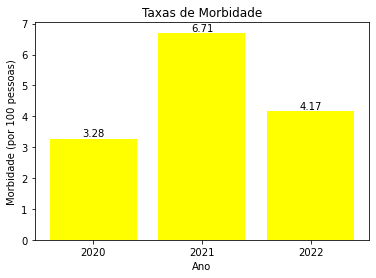

In [41]:
#Morbidade

anos = ['2020', '2021', '2022']
taxas_morbidade = [morbidade2020, morbidade2021, morbidade2022]

plt.bar(anos, taxas_morbidade, color='yellow')  # alterar a cor para amarelo
plt.title('Taxas de Morbidade')
plt.xlabel('Ano')
plt.ylabel('Morbidade (por 100 pessoas)')
# Adicionar rótulos de dados
for i in range(len(anos)):
    plt.text(x = anos[i], y = taxas_morbidade[i], s = f'{taxas_morbidade[i]:.2f}', ha = 'center', va = 'bottom')

plt.show()

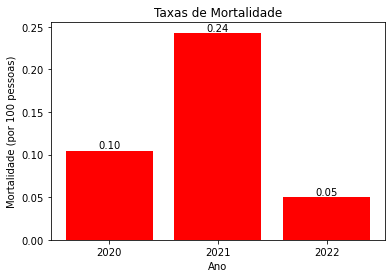

In [42]:
#Mortalidade

anos = ['2020', '2021', '2022']
taxas_mortalidade = [mortalidade2020, mortalidade2021, mortalidade2022]

plt.bar(anos, taxas_mortalidade, color='red')  # alterar a cor para vermelho
plt.title('Taxas de Mortalidade')
plt.xlabel('Ano')
plt.ylabel('Mortalidade (por 100 pessoas)')
# Adicionar rótulos de dados
for i in range(len(anos)):
    plt.text(x = anos[i], y = taxas_mortalidade[i], s = f'{taxas_mortalidade[i]:.2f}', ha = 'center', va = 'bottom')

plt.show()

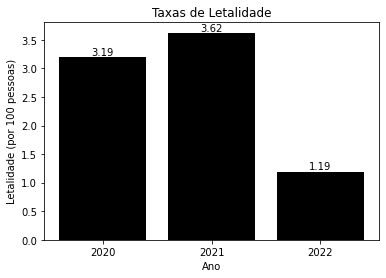

In [43]:
#Letalidade

anos = ['2020', '2021', '2022']
taxas_letalidade = [letalidade2020, letalidade2021, letalidade2022]

plt.bar(anos, taxas_letalidade, color='black')  # alterar a cor para preto
plt.title('Taxas de Letalidade')
plt.xlabel('Ano')
plt.ylabel('Letalidade (por 100 pessoas)')
# Adicionar rótulos de dados
for i in range(len(anos)):
    plt.text(x = anos[i], y = taxas_letalidade[i], s = f'{taxas_letalidade[i]:.2f}', ha = 'center', va = 'bottom')

plt.show()

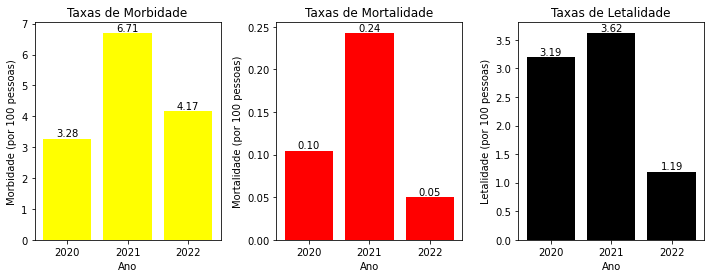

In [44]:
#Gráficos consolidados

# Morbidade
anos = ['2020', '2021', '2022']
taxas_morbidade = [morbidade2020, morbidade2021, morbidade2022]

plt.figure(figsize=(12, 4))  # Ajusta o tamanho da figura (largura: 12 polegadas, altura: 4 polegadas)

plt.subplot(1, 3, 1)  # Cria o primeiro subplot
plt.bar(anos, taxas_morbidade, color='yellow')
plt.title('Taxas de Morbidade')
plt.xlabel('Ano')
plt.ylabel('Morbidade (por 100 pessoas)')
# Adicionar rótulos de dados
for i in range(len(anos)):
    plt.text(x=anos[i], y=taxas_morbidade[i], s=f'{taxas_morbidade[i]:.2f}', ha='center', va='bottom')

# Mortalidade
anos = ['2020', '2021', '2022']
taxas_mortalidade = [mortalidade2020, mortalidade2021, mortalidade2022]

plt.subplot(1, 3, 2)  # Cria o segundo subplot
plt.bar(anos, taxas_mortalidade, color='red')
plt.title('Taxas de Mortalidade')
plt.xlabel('Ano')
plt.ylabel('Mortalidade (por 100 pessoas)')
# Adicionar rótulos de dados
for i in range(len(anos)):
    plt.text(x=anos[i], y=taxas_mortalidade[i], s=f'{taxas_mortalidade[i]:.2f}', ha='center', va='bottom')

# Letalidade
anos = ['2020', '2021', '2022']
taxas_letalidade = [letalidade2020, letalidade2021, letalidade2022]

plt.subplot(1, 3, 3)  # Cria o terceiro subplot
plt.bar(anos, taxas_letalidade, color='black')
plt.title('Taxas de Letalidade')
plt.xlabel('Ano')
plt.ylabel('Letalidade (por 100 pessoas)')
# Adicionar rótulos de dados
for i in range(len(anos)):
    plt.text(x=anos[i], y=taxas_letalidade[i], s=f'{taxas_letalidade[i]:.2f}', ha='center', va='bottom')

plt.subplots_adjust(wspace=0.3)  # Ajusta o espaçamento horizontal entre os subplots
plt.show()


# Verificação da Base de Casos e Óbitos e Doenças Preexistentes

In [45]:
#Baixando a base

caminho_arquivo = r"D:\Pós-graduação - Curso de Especialização Ciências de Dados e Inteligência Artificial\TCC\Casos, óbitos e doenças pré-existentes - 09.06.2023\casos_obitos_doencas_preexistentes.csv"
casos_obitos_doencas_preexistentes = pd.read_csv(caminho_arquivo, sep = ';')
casos_obitos_doencas_preexistentes

,nome_munic,codigo_ibge,idade,cs_sexo,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,diagnostico_covid19
0,Assis,3504008,69.0,MASCULINO,2022-07-15T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1,São Paulo,3550308,60.0,FEMININO,2021-02-21T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
2,Araraquara,3503208,58.0,MASCULINO,2021-06-23T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
3,São Paulo,3550308,45.0,FEMININO,2021-02-03T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
4,São Paulo,3550308,42.0,FEMININO,2021-02-23T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6603622,São Bernardo do Campo,3548708,1.0,MASCULINO,2022-01-11T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
6603623,Itaquaquecetuba,3523107,9.0,MASCULINO,2021-05-18T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
6603624,Campinas,3509502,0.0,MASCULINO,2023-01-02T00:00:00Z,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
6603625,São Paulo,3550308,77.0,FEMININO,2020-05-10T00:00:00Z,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,IGNORADO,NÃO,NÃO,NÃO,CONFIRMADO


In [46]:
#Verificar informações da base

casos_obitos_doencas_preexistentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603627 entries, 0 to 6603626
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   nome_munic               object 
 1   codigo_ibge              int64  
 2   idade                    float64
 3   cs_sexo                  object 
 4   data_inicio_sintomas     object 
 5   obito                    int64  
 6   asma                     object 
 7   cardiopatia              object 
 8   diabetes                 object 
 9   doenca_hematologica      object 
 10  doenca_hepatica          object 
 11  doenca_neurologica       object 
 12  doenca_renal             object 
 13  imunodepressao           object 
 14  obesidade                object 
 15  outros_fatores_de_risco  object 
 16  pneumopatia              object 
 17  puerpera                 object 
 18  sindrome_de_down         object 
 19  diagnostico_covid19      object 
dtypes: float64(1), int64(2), object(17)
memory usa

In [47]:
# Converter a coluna 'data_inicio_sintomas' para o formato de data
casos_obitos_doencas_preexistentes['data_inicio_sintomas'] = pd.to_datetime(casos_obitos_doencas_preexistentes['data_inicio_sintomas'])

#Organizando a base por "datahora" crescente
casos_obitos_doencas_preexistentes = casos_obitos_doencas_preexistentes.sort_values(by='data_inicio_sintomas')

#Verificando
casos_obitos_doencas_preexistentes

,nome_munic,codigo_ibge,idade,cs_sexo,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,diagnostico_covid19
2259585,São Paulo,3550308,19.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1675314,São Paulo,3550308,57.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
3830091,Bauru,3506003,45.0,FEMININO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
136622,Valinhos,3556206,26.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1590145,Registro,3542602,73.0,FEMININO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6603426,Presidente Prudente,3541406,NaN,FEMININO,NaT,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
6603435,São José do Rio Preto,3549805,NaN,MASCULINO,NaT,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
6603567,Carapicuíba,3510609,NaN,FEMININO,NaT,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
6603568,Garça,3516705,NaN,FEMININO,NaT,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO


In [48]:
#Definindo o intervalo temporal da base para o triênio (2020, 2021, 2022)

casos_obitos_doencas_preexistentes = casos_obitos_doencas_preexistentes[casos_obitos_doencas_preexistentes['data_inicio_sintomas']<='2022-12-31']
casos_obitos_doencas_preexistentes

,nome_munic,codigo_ibge,idade,cs_sexo,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,diagnostico_covid19
2259585,São Paulo,3550308,19.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1675314,São Paulo,3550308,57.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
3830091,Bauru,3506003,45.0,FEMININO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
136622,Valinhos,3556206,26.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1590145,Registro,3542602,73.0,FEMININO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747696,Bauru,3506003,34.0,MASCULINO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
759041,Bauru,3506003,58.0,FEMININO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1163831,São José do Rio Preto,3549805,61.0,FEMININO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
5577648,São José do Rio Preto,3549805,37.0,MASCULINO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO


In [49]:
#Verificando campos em branco na base do triênio

casos_obitos_doencas_preexistentes.isnull().sum()

nome_munic                    0
codigo_ibge                   0
idade                      6921
cs_sexo                       1
data_inicio_sintomas          0
obito                         0
asma                          0
cardiopatia                   0
diabetes                      0
doenca_hematologica           0
doenca_hepatica               0
doenca_neurologica            0
doenca_renal                  0
imunodepressao                0
obesidade                     0
outros_fatores_de_risco       0
pneumopatia                   0
puerpera                      0
sindrome_de_down              0
diagnostico_covid19           0
dtype: int64

In [50]:
#Removendo os campos em branco (insignificantes em relação ao tamanho da base)

casos_obitos_doencas_preexistentes = casos_obitos_doencas_preexistentes.dropna()
casos_obitos_doencas_preexistentes

,nome_munic,codigo_ibge,idade,cs_sexo,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,diagnostico_covid19
2259585,São Paulo,3550308,19.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1675314,São Paulo,3550308,57.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
3830091,Bauru,3506003,45.0,FEMININO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
136622,Valinhos,3556206,26.0,MASCULINO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1590145,Registro,3542602,73.0,FEMININO,2020-02-04 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747696,Bauru,3506003,34.0,MASCULINO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
759041,Bauru,3506003,58.0,FEMININO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
1163831,São José do Rio Preto,3549805,61.0,FEMININO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO
5577648,São José do Rio Preto,3549805,37.0,MASCULINO,2022-12-31 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,CONFIRMADO


In [51]:
#Verificando colunas para auxílio nas etapas posteriores da análise
casos_obitos_doencas_preexistentes.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'data_inicio_sintomas',
       'obito', 'asma', 'cardiopatia', 'diabetes', 'doenca_hematologica',
       'doenca_hepatica', 'doenca_neurologica', 'doenca_renal',
       'imunodepressao', 'obesidade', 'outros_fatores_de_risco', 'pneumopatia',
       'puerpera', 'sindrome_de_down', 'diagnostico_covid19'],
      dtype='object')

In [52]:
#Verificando as colunas "objeto" para decobrir a lógica de seu preenchimento

#verificando lançamentos em 'asma'
print("ASMA")
asma_unique = (casos_obitos_doencas_preexistentes['asma'].unique())
print("Valores para asma:", asma_unique)
asma = casos_obitos_doencas_preexistentes['asma'].value_counts()
print(asma)
print(".")

#verificando lançamentos em 'cardiopatia'
print("CARDIOPATIA")
cardiopatia_unique = (casos_obitos_doencas_preexistentes['cardiopatia'].unique())
print("Valores para cardiopatia:", cardiopatia_unique)
cardiopatia = casos_obitos_doencas_preexistentes['cardiopatia'].value_counts()
print(cardiopatia)
print(".")

#verificando lançamentos em 'diabetes'
print("DIABETES")
diabetes_unique = (casos_obitos_doencas_preexistentes['diabetes'].unique())
print("Valores para diabetes:", cardiopatia_unique)
diabetes = casos_obitos_doencas_preexistentes['diabetes'].value_counts()
print(diabetes)
print(".")

# Verificando lançamentos em 'doenca_hematologica'
print("DOENÇA HEMATOLÓGICA")
doenca_hematologica_unique = casos_obitos_doencas_preexistentes['doenca_hematologica'].unique()
print("Valores para doenca_hematologica:", doenca_hematologica_unique)
doenca_hematologica = casos_obitos_doencas_preexistentes['doenca_hematologica'].value_counts()
print(doenca_hematologica)
print(".")

# Verificando lançamentos em 'doenca_hepatica'
print("DOENÇA HEPÁTICA")
doenca_hepatica_unique = casos_obitos_doencas_preexistentes['doenca_hepatica'].unique()
print("Valores para doenca_hepatica:", doenca_hepatica_unique)
doenca_hepatica = casos_obitos_doencas_preexistentes['doenca_hepatica'].value_counts()
print(doenca_hepatica)
print(".")

# Verificando lançamentos em 'doenca_neurologica'
print("DOENÇA NEUROLÓGICA")
doenca_neurologica_unique = casos_obitos_doencas_preexistentes['doenca_neurologica'].unique()
print("Valores para doenca_neurologica:", doenca_neurologica_unique)
doenca_neurologica = casos_obitos_doencas_preexistentes['doenca_neurologica'].value_counts()
print(doenca_neurologica)
print(".")

# Verificando lançamentos em 'doenca_renal'
print("DOENÇA RENAL")
doenca_renal_unique = casos_obitos_doencas_preexistentes['doenca_renal'].unique()
print("Valores para doenca_renal:", doenca_renal_unique)
doenca_renal = casos_obitos_doencas_preexistentes['doenca_renal'].value_counts()
print(doenca_renal)
print(".")

# Verificando lançamentos em 'imunodepressao'
print("IMUNODEPRESSÃO")
imunodepressao_unique = casos_obitos_doencas_preexistentes['imunodepressao'].unique()
print("Valores para imunodepressao:", imunodepressao_unique)
imunodepressao = casos_obitos_doencas_preexistentes['imunodepressao'].value_counts()
print(imunodepressao)
print(".")

# Verificando lançamentos em 'obesidade'
print("OBESIDADE")
obesidade_unique = casos_obitos_doencas_preexistentes['obesidade'].unique()
print("Valores para obesidade:", obesidade_unique)
obesidade = casos_obitos_doencas_preexistentes['obesidade'].value_counts()
print(obesidade)
print(".")

# Verificando lançamentos em 'outros_fatores_de_risco'
print("OUTROS FATORES DE RISCO")
outros_fatores_unique = casos_obitos_doencas_preexistentes['outros_fatores_de_risco'].unique()
print("Valores para outros_fatores_de_risco:", outros_fatores_unique)
outros_fatores = casos_obitos_doencas_preexistentes['outros_fatores_de_risco'].value_counts()
print(outros_fatores)
print(".")

# Verificando lançamentos em 'pneumopatia'
print("PNEUMOPATIA")
pneumopatia_unique = casos_obitos_doencas_preexistentes['pneumopatia'].unique()
print("Valores para pneumopatia:", pneumopatia_unique)
pneumopatia = casos_obitos_doencas_preexistentes['pneumopatia'].value_counts()
print(pneumopatia)
print(".")

# Verificando lançamentos em 'puerpera'
print("PUERPERA")
puerpera_unique = casos_obitos_doencas_preexistentes['puerpera'].unique()
print("Valores para puerpera:", puerpera_unique)
puerpera = casos_obitos_doencas_preexistentes['puerpera'].value_counts()
print(puerpera)
print(".")

# Verificando lançamentos em 'sindrome_de_down'
print("SINDROME DE DOWN")
sindrome_de_down_unique = casos_obitos_doencas_preexistentes['sindrome_de_down'].unique()
print("Valores para sindrome_de_down:", sindrome_de_down_unique)
sindrome_de_down = casos_obitos_doencas_preexistentes['sindrome_de_down'].value_counts()
print(sindrome_de_down)
print(".")

# Verificando lançamentos em 'cs_sexo'
print("SEXO")
cs_sexo_unique = casos_obitos_doencas_preexistentes['cs_sexo'].unique()
print("Valores para cs_sexo:", sindrome_de_down_unique)
cs_sexo = casos_obitos_doencas_preexistentes['cs_sexo'].value_counts()
print(cs_sexo)
print(".")

# Verificando lançamentos em 'obito'
print("ÓBITOS")
obito_unique = casos_obitos_doencas_preexistentes['obito'].unique()
print("Valores para obito:", obito_unique)
contagem_obito = casos_obitos_doencas_preexistentes['obito'].value_counts()
print(contagem_obito)

ASMA
Valores para asma: ['IGNORADO' 'NÃO' 'SIM']
IGNORADO    6027385
NÃO          212979
SIM           15769
Name: asma, dtype: int64
.
CARDIOPATIA
Valores para cardiopatia: ['IGNORADO' 'SIM' 'NÃO']
IGNORADO    5701388
SIM          455830
NÃO           98915
Name: cardiopatia, dtype: int64
.
DIABETES
Valores para diabetes: ['IGNORADO' 'SIM' 'NÃO']
IGNORADO    5815872
SIM          301392
NÃO          138869
Name: diabetes, dtype: int64
.
DOENÇA HEMATOLÓGICA
Valores para doenca_hematologica: ['IGNORADO' 'NÃO' 'SIM']
IGNORADO    6030903
NÃO          220887
SIM            4343
Name: doenca_hematologica, dtype: int64
.
DOENÇA HEPÁTICA
Valores para doenca_hepatica: ['IGNORADO' 'NÃO' 'SIM']
IGNORADO    6031662
NÃO          219893
SIM            4578
Name: doenca_hepatica, dtype: int64
.
DOENÇA NEUROLÓGICA
Valores para doenca_neurologica: ['IGNORADO' 'NÃO' 'SIM']
IGNORADO    6024568
NÃO          208622
SIM           22943
Name: doenca_neurologica, dtype: int64
.
DOENÇA RENAL
Valores para doenc

In [53]:
#Verificação se a base tem apenas confirmados para COVID-19

casos_obitos_doencas_preexistentes['diagnostico_covid19'].unique()

array(['CONFIRMADO'], dtype=object)

In [54]:
# Calcular a média de 'idade' e arredondar para não ter casas decimais
media_idade = round(casos_obitos_doencas_preexistentes['idade'].mean())
print("Média de 'idade':", media_idade)

Média de 'idade': 41


### <div style="text-align: justify;"> Visando modelagem, os valores "IGNORADOS" foram considerados "NÃO", e  "SIM" e "NÃO" foram transformados em 0 e 1

In [55]:
pd.options.mode.chained_assignment = None
print("AJUSTE ASMA")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'asma'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['asma'] == 'IGNORADO', 'asma'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'asma'
casos_obitos_doencas_preexistentes['asma'] = casos_obitos_doencas_preexistentes['asma'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['asma'].value_counts())
print('.')

print("AJUSTE CARDIOPATIA")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'cardiopatia'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['cardiopatia'] == 'IGNORADO', 'cardiopatia'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'cardiopatia'
casos_obitos_doencas_preexistentes['cardiopatia'] = casos_obitos_doencas_preexistentes['cardiopatia'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['cardiopatia'].value_counts())
print('.')

print("AJUSTE DIABETES")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'diabetes'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['diabetes'] == 'IGNORADO', 'diabetes'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'cardiopatia'
casos_obitos_doencas_preexistentes['diabetes'] = casos_obitos_doencas_preexistentes['diabetes'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['diabetes'].value_counts())
print('.')

print("AJUSTE DOENÇA HEMATOLÓGICA")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'doenca_hematologica'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['doenca_hematologica'] == 'IGNORADO', 'doenca_hematologica'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'cardiopatia'
casos_obitos_doencas_preexistentes['doenca_hematologica'] = casos_obitos_doencas_preexistentes['doenca_hematologica'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['doenca_hematologica'].value_counts())
print('.')

print("AJUSTE DOENÇA HEPÁTICA")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'doenca_hepatica'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['doenca_hepatica'] == 'IGNORADO', 'doenca_hepatica'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'cardiopatia'
casos_obitos_doencas_preexistentes['doenca_hepatica'] = casos_obitos_doencas_preexistentes['doenca_hepatica'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['doenca_hepatica'].value_counts())
print('.')

print("AJUSTE DOENÇA NEUROLÓGICA")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'doenca_neurologica'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['doenca_neurologica'] == 'IGNORADO', 'doenca_neurologica'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'doenca_neurologica'
casos_obitos_doencas_preexistentes['doenca_neurologica'] = casos_obitos_doencas_preexistentes['doenca_neurologica'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['doenca_neurologica'].value_counts())
print('.')

print("AJUSTE DOENÇA RENAL")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'doenca_renal'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['doenca_renal'] == 'IGNORADO', 'doenca_renal'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'doenca_renal'
casos_obitos_doencas_preexistentes['doenca_renal'] = casos_obitos_doencas_preexistentes['doenca_renal'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['doenca_renal'].value_counts())
print('.')

print("AJUSTE IMUNODEPRESSÃO")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'imunodepressao'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['imunodepressao'] == 'IGNORADO', 'imunodepressao'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'imunodepressao'
casos_obitos_doencas_preexistentes['imunodepressao'] = casos_obitos_doencas_preexistentes['imunodepressao'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['imunodepressao'].value_counts())
print('.')

print("AJUSTE OBESIDADE")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'obesidade'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['obesidade'] == 'IGNORADO', 'obesidade'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'obesidade'
casos_obitos_doencas_preexistentes['obesidade'] = casos_obitos_doencas_preexistentes['obesidade'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['obesidade'].value_counts())
print('.')

print("AJUSTE OUTROS FATORES DE RISCO")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'outros_fatores_de_risco'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['outros_fatores_de_risco'] == 'IGNORADO', 'outros_fatores_de_risco'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'outros_fatores_de_risco'
casos_obitos_doencas_preexistentes['outros_fatores_de_risco'] = casos_obitos_doencas_preexistentes['outros_fatores_de_risco'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['outros_fatores_de_risco'].value_counts())
print('.')

print("AJUSTE PNEUMOPATIA")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'pneumopatia'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['pneumopatia'] == 'IGNORADO', 'pneumopatia'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'pneumopatia'
casos_obitos_doencas_preexistentes['pneumopatia'] = casos_obitos_doencas_preexistentes['pneumopatia'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['pneumopatia'].value_counts())
print('.')

print("AJUSTE PUERPERA")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'puerpera'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['puerpera'] == 'IGNORADO', 'puerpera'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'puerpera'
casos_obitos_doencas_preexistentes['puerpera'] = casos_obitos_doencas_preexistentes['puerpera'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['puerpera'].value_counts())
print('.')

print("AJUSTE SINDROME DE DOWN")
# Substituir 'IGNORADO' por 'NÃO' na coluna 'sindrome_de_down'
casos_obitos_doencas_preexistentes.loc[casos_obitos_doencas_preexistentes['sindrome_de_down'] == 'IGNORADO', 'sindrome_de_down'] = 'NÃO'
# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'sindrome_de_down'
casos_obitos_doencas_preexistentes['sindrome_de_down'] = casos_obitos_doencas_preexistentes['sindrome_de_down'].replace({'SIM': 1, 'NÃO': 0})
print(casos_obitos_doencas_preexistentes['sindrome_de_down'].value_counts())
print('.')

AJUSTE ASMA
0    6240364
1      15769
Name: asma, dtype: int64
.
AJUSTE CARDIOPATIA
0    5800303
1     455830
Name: cardiopatia, dtype: int64
.
AJUSTE DIABETES
0    5954741
1     301392
Name: diabetes, dtype: int64
.
AJUSTE DOENÇA HEMATOLÓGICA
0    6251790
1       4343
Name: doenca_hematologica, dtype: int64
.
AJUSTE DOENÇA HEPÁTICA
0    6251555
1       4578
Name: doenca_hepatica, dtype: int64
.
AJUSTE DOENÇA NEUROLÓGICA
0    6233190
1      22943
Name: doenca_neurologica, dtype: int64
.
AJUSTE DOENÇA RENAL
0    6225247
1      30886
Name: doenca_renal, dtype: int64
.
AJUSTE IMUNODEPRESSÃO
0    6218930
1      37203
Name: imunodepressao, dtype: int64
.
AJUSTE OBESIDADE
0    6207944
1      48189
Name: obesidade, dtype: int64
.
AJUSTE OUTROS FATORES DE RISCO
0    6106706
1     149427
Name: outros_fatores_de_risco, dtype: int64
.
AJUSTE PNEUMOPATIA
0    6236711
1      19422
Name: pneumopatia, dtype: int64
.
AJUSTE PUERPERA
0    6254498
1       1635
Name: puerpera, dtype: int64
.
AJUSTE SINDR

In [56]:
#Ajuste da variável 'cs_sexo'

#Remoção de 'IGNORADO' e 'INDEFINIDO'
valores_indesejados = ['IGNORADO', 'INDEFINIDO'] #Quantidade irrelevante em relação aos demais dados
casos_obitos_doencas_preexistentes = casos_obitos_doencas_preexistentes.loc[~casos_obitos_doencas_preexistentes['cs_sexo'].isin(valores_indesejados)]

# Substituindo valores "SIM" por 1 e "NÃO" por 2 na coluna 'cs_sexo'
casos_obitos_doencas_preexistentes['cs_sexo'] = casos_obitos_doencas_preexistentes['cs_sexo'].replace({'MASCULINO': 1, 'FEMININO': 0})
casos_obitos_doencas_preexistentes['cs_sexo'].value_counts()

0    3420531
1    2834869
Name: cs_sexo, dtype: int64

In [57]:
casos_obitos_doencas_preexistentes.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'cs_sexo', 'data_inicio_sintomas',
       'obito', 'asma', 'cardiopatia', 'diabetes', 'doenca_hematologica',
       'doenca_hepatica', 'doenca_neurologica', 'doenca_renal',
       'imunodepressao', 'obesidade', 'outros_fatores_de_risco', 'pneumopatia',
       'puerpera', 'sindrome_de_down', 'diagnostico_covid19'],
      dtype='object')

### Modelagem da Base de Casos e Óbitos e Doenças Preexistentes

### Definição de Variáveis

In [58]:
#Inserindo Todas as Variáveis de interesse em 'x' para Posterior Ajuste para Melhora do Modelo

#Definindo 'x' e 'y'
x = pd.DataFrame(casos_obitos_doencas_preexistentes[['idade',
                       'cs_sexo',
                       #'data_inicio_sintomas',
                       'asma',
                       'cardiopatia',
                       'diabetes',
                       'doenca_hematologica',
                       'doenca_hepatica',
                       'doenca_neurologica',
                       'doenca_renal',
                       'imunodepressao',
                       'obesidade',
                       'outros_fatores_de_risco',
                       'pneumopatia',
                       'puerpera',
                       'sindrome_de_down'
                      ]])
y = casos_obitos_doencas_preexistentes['obito']

### Particionar a base de dados

In [59]:
# Importar função de treinamento e teste

from sklearn.model_selection import train_test_split

In [60]:
#Particionar a base de dados

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.7,
                                                    random_state=0,
                                                    stratify = y 
                                                   )
#Estratificação por óbito, tendo em vista o desbalanceamento de classe (manter mesma proporção de óbitos em treino e teste).

### Regressão Logística

In [61]:
#Importando a Biblioteca

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [62]:
#Montando o Modelo de Regressão Logística

modelo_log = LogisticRegression(random_state = 0, max_iter=800)
modelo_log.fit(X_train, y_train)

LogisticRegression(max_iter=800, random_state=0)

In [63]:
y_pred_log = modelo_log.predict(X_test)

In [64]:
#Matriz de Confusão

cm = metrics.confusion_matrix(y_test, y_pred_log)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1814186    8804]
 [  44428    9202]]


In [65]:
#Modelo

print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1822990
           1       0.51      0.17      0.26     53630

    accuracy                           0.97   1876620
   macro avg       0.74      0.58      0.62   1876620
weighted avg       0.96      0.97      0.96   1876620



### Árvore de Decisão

In [66]:
#Importar bibliotecas

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics

In [67]:
#Montando a Árvore de Decisão

modelo_ad = DecisionTreeClassifier(criterion="gini",
                                   max_depth=10, 
                                   min_samples_leaf=5)
modelo_ad = modelo_ad.fit(X_train, y_train)

In [68]:
y_pred_ad = modelo_ad.predict(X_test)

In [69]:
#Montando Matriz de Confusão

cm = metrics.confusion_matrix(y_test, y_pred_ad)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1817257    5733]
 [  47100    6530]]


In [70]:
#Apresentando o Modelo

print(metrics.classification_report(y_test, y_pred_ad))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99   1822990
           1       0.53      0.12      0.20     53630

    accuracy                           0.97   1876620
   macro avg       0.75      0.56      0.59   1876620
weighted avg       0.96      0.97      0.96   1876620



In [71]:
# Feature importance

importancia_ad = pd.DataFrame({
    'feature': modelo_ad.feature_names_in_,
    'importancia': modelo_ad.feature_importances_
})

# Ordenar o dataframe pela importância das features
importancia_ad = importancia_ad.sort_values('importancia', ascending=False)
importancia_ad

,feature,importancia
11,outros_fatores_de_risco,0.440048
0,idade,0.252873
3,cardiopatia,0.094779
10,obesidade,0.080257
7,doenca_neurologica,0.042785
12,pneumopatia,0.027389
8,doenca_renal,0.018975
1,cs_sexo,0.015717
4,diabetes,0.015535
6,doenca_hepatica,0.005799


### Árvore de decisão ajustada com otimização por GridSearch visando melhora dos hiperparâmetros do modelo.

In [72]:
#Importar bibliotecas

from sklearn.model_selection import GridSearchCV

In [73]:
#Montando a Árvore de Decisão - citar modelos no trabalho (quantos foram comparados com gridsearch)

param_grid_ad_gs = {'criterion':['gini', 'entropy', 'log_loss'],#para RF testar só gini e entropy
              'max_depth':[3,5,7,9,11], #3,7,11 para RF
              'min_samples_split':[10,20,30]} #RF usar 10, 30 e 50
modelo_ad_gs = DecisionTreeClassifier()

In [74]:
# GridSearch
modelo_ad_gs_grid_search = GridSearchCV(modelo_ad_gs, 
                                     param_grid_ad_gs, 
                                     cv=5, 
                                     scoring='recall')

In [75]:
#GridSearch

%time
modelo_ad_gs_grid_search.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns


C:\Users\wagne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\wagne\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\wagne\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\wagne\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_split': [10, 20, 30]},
             scoring='recall')

In [76]:
# Obtendo o melhor modelo encontrado pelo GridSearch

melhor_modelo_ad_gs = modelo_ad_gs_grid_search.best_estimator_
melhor_modelo_ad_gs

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=30)

In [77]:
# Predição com o melhor modelo

y_pred_ad_gs = melhor_modelo_ad_gs.predict(X_test)

In [78]:
# Montando Matriz de Confusão

cm = metrics.confusion_matrix(y_test, y_pred_ad_gs)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1817659    5331]
 [  47348    6282]]


In [79]:
# Apresentando o Modelo de Árvore de Decisão

print(metrics.classification_report(y_test, y_pred_ad_gs))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99   1822990
           1       0.54      0.12      0.19     53630

    accuracy                           0.97   1876620
   macro avg       0.76      0.56      0.59   1876620
weighted avg       0.96      0.97      0.96   1876620



In [80]:
# Feature importance Árvore de Decisão

importancia_ad_gs = pd.DataFrame({
    'feature': X_train.columns,
    'importancia': melhor_modelo_ad_gs.feature_importances_
})

In [81]:
# Ordenar o dataframe pela importância das features

importancia_ad_gs = importancia_ad_gs.sort_values('importancia', ascending=False)
importancia_ad_gs

,feature,importancia
0,idade,0.531569
11,outros_fatores_de_risco,0.228175
3,cardiopatia,0.086206
10,obesidade,0.076283
4,diabetes,0.020127
7,doenca_neurologica,0.020098
1,cs_sexo,0.014755
12,pneumopatia,0.011754
8,doenca_renal,0.006666
2,asma,0.001566


### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [83]:
# Definir parâmetros do modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=0)

In [84]:
#Ajustar o modelo
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [85]:
y_pred_rf = modelo_rf.predict(X_test)

In [86]:
# Montando Matriz de Confusão

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1816149    6841]
 [  46755    6875]]


In [87]:
from sklearn.metrics import classification_report

In [88]:
#Apresentando o Modelo de Random Forest

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99   1822990
           1       0.50      0.13      0.20     53630

    accuracy                           0.97   1876620
   macro avg       0.74      0.56      0.59   1876620
weighted avg       0.96      0.97      0.96   1876620



In [89]:
# Feature importance Random Forest

importancia_rf = pd.DataFrame({
    'feature': modelo_rf.feature_names_in_,
    'importancia': modelo_rf.feature_importances_
})

# Ordenar o dataframe pela importância das features
importancia_rf = importancia_rf.sort_values('importancia', ascending=False)
importancia_rf

,feature,importancia
0,idade,0.334143
11,outros_fatores_de_risco,0.262729
3,cardiopatia,0.090528
10,obesidade,0.073884
4,diabetes,0.062379
7,doenca_neurologica,0.056108
12,pneumopatia,0.038179
8,doenca_renal,0.024758
1,cs_sexo,0.016000
6,doenca_hepatica,0.011663


### Random Forest ajustada com otimização por GridSearch visando melhora dos hiperparâmetros do modelo.

In [90]:
# Definir parâmetros do modelo

param_grid_rf_gs = {
    'n_estimators': [100, 200, 300],  # Testar diferentes números de estimadores
}

In [91]:
# Criar o modelo Random Forest

modelo_rf_gs = RandomForestClassifier(random_state=0)

In [92]:
# Realizar o GridSearch

grid_search_rf = GridSearchCV(modelo_rf_gs, 
                              param_grid_rf_gs, 
                              cv=5, 
                              scoring='recall')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [100, 200, 300]}, scoring='recall')

In [93]:
# Obter o melhor modelo encontrado pelo GridSearch

melhor_modelo_rf = grid_search_rf.best_estimator_
melhor_modelo_rf

RandomForestClassifier(random_state=0)

In [94]:
# Realizar a predição com o melhor modelo

y_pred_rf_gs = melhor_modelo_rf.predict(X_test)

In [95]:
# Montando Matriz de Confusão

cm = metrics.confusion_matrix(y_test, y_pred_rf_gs)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1816149    6841]
 [  46755    6875]]


In [96]:
# Apresentar o Modelo de Random Forest

print(classification_report(y_test, y_pred_rf_gs))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99   1822990
           1       0.50      0.13      0.20     53630

    accuracy                           0.97   1876620
   macro avg       0.74      0.56      0.59   1876620
weighted avg       0.96      0.97      0.96   1876620



In [97]:
# Feature importance Random Forest

importancia_rf_gs = pd.DataFrame({
    'feature': X_train.columns,
    'importancia': melhor_modelo_rf.feature_importances_
})

In [98]:
# Ordenar o dataframe pela importância das features

importancia_rf_gs = importancia_rf_gs.sort_values('importancia', ascending=False)
importancia_rf_gs

,feature,importancia
0,idade,0.334143
11,outros_fatores_de_risco,0.262729
3,cardiopatia,0.090528
10,obesidade,0.073884
4,diabetes,0.062379
7,doenca_neurologica,0.056108
12,pneumopatia,0.038179
8,doenca_renal,0.024758
1,cs_sexo,0.016000
6,doenca_hepatica,0.011663


### Gradient Boosting

In [99]:
# Importando a biblioteca

from sklearn.ensemble import GradientBoostingClassifier

In [100]:
# Montando o modelo Gradient Boosting

modelo_gb = GradientBoostingClassifier(random_state=0)
modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_test)

In [101]:
# Matriz de Confusão

cm = metrics.confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1816143    6847]
 [  45984    7646]]


In [102]:
# Relatório de classificação

print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1822990
           1       0.53      0.14      0.22     53630

    accuracy                           0.97   1876620
   macro avg       0.75      0.57      0.61   1876620
weighted avg       0.96      0.97      0.96   1876620



In [103]:
# Importância das características

importance_gb = pd.DataFrame({'feature': x.columns, 
                           'importance': modelo_gb.feature_importances_})
importance_gb = importance_gb.sort_values('importance', 
                                    ascending=False)
print("Feature Importance:\n", importance_gb)

Feature Importance:
                     feature  importance
11  outros_fatores_de_risco    0.390741
0                     idade    0.259957
3               cardiopatia    0.093130
10                obesidade    0.075758
7        doenca_neurologica    0.044204
4                  diabetes    0.040663
12              pneumopatia    0.034103
8              doenca_renal    0.025354
1                   cs_sexo    0.015122
6           doenca_hepatica    0.008712
5       doenca_hematologica    0.003900
9            imunodepressao    0.003701
2                      asma    0.002741
14         sindrome_de_down    0.001716
13                 puerpera    0.000198


### Comparativo de Modelos

In [104]:
#Regressão Logística
print("Regressão Logística")
print(metrics.classification_report(y_test, y_pred_log))
print(".")
#Árvore de Decisão
print("Árvore de Decisão")
print(metrics.classification_report(y_test, y_pred_ad))
print(importancia_ad)
print(".")
#Árvore de Decisão com GridSearch
print("Árvore de Decisão com GridSearch")
print(metrics.classification_report(y_test, y_pred_ad_gs))
print(importancia_ad_gs)
print(".")
#Random Forest
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(importancia_rf)
print(".")
#Random Forest com GridSearch
print("Random Forest com GridSearch")
print(classification_report(y_test, y_pred_rf_gs))
print(importancia_rf_gs)
print(".")
#Gradient Boosting
print("Gradient Boosting")
print(metrics.classification_report(y_test, y_pred_gb))
print("Feature Importance:\n", importance_gb)
print(".")

Regressão Logística
              precision    recall  f1-score   support

           0       0.98      1.00      0.99   1822990
           1       0.51      0.17      0.26     53630

    accuracy                           0.97   1876620
   macro avg       0.74      0.58      0.62   1876620
weighted avg       0.96      0.97      0.96   1876620

.
Árvore de Decisão
              precision    recall  f1-score   support

           0       0.97      1.00      0.99   1822990
           1       0.53      0.12      0.20     53630

    accuracy                           0.97   1876620
   macro avg       0.75      0.56      0.59   1876620
weighted avg       0.96      0.97      0.96   1876620

                    feature  importancia
11  outros_fatores_de_risco     0.440048
0                     idade     0.252873
3               cardiopatia     0.094779
10                obesidade     0.080257
7        doenca_neurologica     0.042785
12              pneumopatia     0.027389
8              doen

# Verificação da Base de Casos e Óbitos por Raça e Cor

In [105]:
#Baixando a base

caminho_arquivo = r"D:\Pós-graduação - Curso de Especialização Ciências de Dados e Inteligência Artificial\TCC\Casos e óbitos por raça-cor e município - 03.07.2023\casos_obitos_raca_cor.csv"
casos_obitos_raca_cor = pd.read_csv(caminho_arquivo, sep=';')
casos_obitos_raca_cor

,codigo_ibge,nome_munic,nome_drs,obito,raca_cor,idade,cs_sexo,diagnostico_covid19,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,pneumopatia,puerpera,sindrome_de_down
0,3504008.0,Assis,Marília,False,IGNORADO,69.0,MASCULINO,CONFIRMADO,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
1,3550308.0,São Paulo,Município de São Paulo,False,IGNORADO,60.0,FEMININO,CONFIRMADO,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
2,3503208.0,Araraquara,Araraquara,False,PARDA,58.0,MASCULINO,CONFIRMADO,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
3,3550308.0,São Paulo,Município de São Paulo,False,IGNORADO,45.0,FEMININO,CONFIRMADO,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
4,3550308.0,São Paulo,Município de São Paulo,False,IGNORADO,42.0,FEMININO,CONFIRMADO,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6632582,3507001.0,Boituva,Sorocaba,True,BRANCA,65.0,MASCULINO,CONFIRMADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6632583,3514908.0,Elias Fausto,Piracicaba,False,BRANCA,52.0,MASCULINO,CONFIRMADO,NaN,9.0,1.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
6632584,3547304.0,Santana de Parnaíba,Grande SP Oeste,False,BRANCA,55.0,MASCULINO,CONFIRMADO,NaN,9.0,9.0,NaN,NaN,NaN,9.0,9.0,NaN,NaN,NaN,NaN
6632585,3552205.0,Sorocaba,Sorocaba,False,BRANCA,52.0,MASCULINO,CONFIRMADO,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [106]:
casos_obitos_raca_cor.info()
#Base não possui coluna de data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6632587 entries, 0 to 6632586
Data columns (total 20 columns):
 #   Column               Dtype  
---  ------               -----  
 0   codigo_ibge          float64
 1   nome_munic           object 
 2   nome_drs             object 
 3   obito                bool   
 4   raca_cor             object 
 5   idade                float64
 6   cs_sexo              object 
 7   diagnostico_covid19  object 
 8   asma                 float64
 9   cardiopatia          float64
 10  diabetes             float64
 11  doenca_hematologica  float64
 12  doenca_hepatica      float64
 13  doenca_neurologica   float64
 14  doenca_renal         float64
 15  imunodepressao       float64
 16  obesidade            float64
 17  pneumopatia          float64
 18  puerpera             float64
 19  sindrome_de_down     float64
dtypes: bool(1), float64(14), object(5)
memory usage: 967.8+ MB


In [107]:
#Verificando campos em branco na base

casos_obitos_raca_cor.isnull().sum()
#A base além de não apresentar uma variável de data, também apresenta muitos campos em branco

codigo_ibge                269
nome_munic                 269
nome_drs                   269
obito                        0
raca_cor                 42166
idade                   210447
cs_sexo                      1
diagnostico_covid19          0
asma                   6394295
cardiopatia             316599
diabetes                338337
doenca_hematologica    6397669
doenca_hepatica        6398474
doenca_neurologica     6391475
doenca_renal            385312
imunodepressao          387064
obesidade              6385549
pneumopatia            6391946
puerpera               6399658
sindrome_de_down       6398637
dtype: int64

In [108]:
casos_obitos_raca_cor['diagnostico_covid19'].unique()
#Base apenas de casos confirmados

array(['CONFIRMADO'], dtype=object)

In [109]:
casos_obitos_raca_cor['obito'].unique()

array([False,  True])

In [110]:
casos_obitos_raca_cor['asma'].unique()

array([nan,  2.,  1.,  9.])

In [111]:
casos_obitos_raca_cor['cardiopatia'].unique()

array([ 9.,  1., nan,  2.])

In [112]:
casos_obitos_raca_cor['diabetes'].unique()

array([ 9.,  1., nan,  2.])

Por se tratar de uma base de dados sem a variável de data e com muitos campos em branco, tendo em vista que o escopo do trabalho em questão é avaliar os dados no triênio de 2020 a 2022, e que as variáveis apresentadas em sua maioria já constam na base de doenças preexistentes, optou-se por não utilizar a base de casos e óbito por raça/cor nesta análise de dados.